<a href="https://colab.research.google.com/github/AlirezaAhadipour/Nutrients/blob/main/Python_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Read the csv files
import pandas as pd

df_macro = pd.read_csv('USDA_Macronutrients.csv')
df_micro = pd.read_csv('USDA_Micronutrients.csv')

In [2]:
df_macro.head(3)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate
0,2047,"SALT,TABLE",0,0.0,0.0,0.00
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04


In [3]:
df_micro.head(3)

,ID,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,4038,0,0.0,0.00,0.0,0.00,0,0.0,149.40,0.0
1,8504,813,NaN,17.17,45.0,67.67,630,239.7,80.46,NaN
2,25021,386,0.0,16.90,886.0,14.20,412,68.0,64.25,3.1


In [4]:
# Merge the data frames using the variable "ID". Name the Merged Data Frame "USDA".
merged_df = pd.merge(df_macro, df_micro, on='ID')
merged_df.head(3)


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,2047,"SALT,TABLE",0,0.0,0.0,0.00,"38,758",0.0,0.00,24.0,0.33,8,0.0,0.0,0.0
1,2048,"VINEGAR,CIDER",21,0.0,0.0,0.93,5,0.0,0.40,7.0,0.20,73,0.0,0.0,0.0
2,2053,"VINEGAR,DISTILLED",18,0.0,0.0,0.04,2,0.0,0.04,6.0,0.03,2,0.0,0.0,0.0


In [5]:
# Prepare the dataset for analysis.
merged_df.dtypes


ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium           object
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium        object
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [6]:
# Sodium and Potassium columns are stored as an object. First I have to convert them to float/int
merged_df['Sodium'] = merged_df['Sodium'].str.replace(',', '').astype(float)
merged_df['Potassium'] = merged_df['Potassium'].str.replace(',', '').astype(float)

merged_df.dtypes


ID                int64
Description      object
Calories          int64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

cols_to_standardize = merged_df.columns.difference(['ID', 'Description'])
scaled_df = merged_df.copy()

scalar = StandardScaler()
scaled_df[cols_to_standardize] = scalar.fit_transform(merged_df[cols_to_standardize])


In [8]:
scaled_df.isna().sum()

ID                 0
Description        0
Calories           0
Protein            0
TotalFat           0
Carbohydrate       0
Sodium            83
Cholesterol      287
Sugar           1909
Calcium          135
Iron             122
Potassium        408
VitaminC         331
VitaminE        2719
VitaminD        2833
dtype: int64

In [9]:
# Remove records with missing values in 4 or more vectors.
cleaned_df = scaled_df.dropna(thresh=len(scaled_df.columns) - 3)
cleaned_df.isna().sum()

ID                 0
Description        0
Calories           0
Protein            0
TotalFat           0
Carbohydrate       0
Sodium             0
Cholesterol      120
Sugar           1670
Calcium            9
Iron              11
Potassium        242
VitaminC          78
VitaminE        2425
VitaminD        2512
dtype: int64

In [10]:
# For records with missing values for Sugar, Vitamin E and Vitamin D, replace missing values with mean value for the respective vector.
for column in ['Sugar', 'VitaminE', 'VitaminD']:
    cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mean())

cleaned_df.isna().sum()


<ipython-input-10-bec9199798c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].fillna(cleaned_df[column].mean())


ID                0
Description       0
Calories          0
Protein           0
TotalFat          0
Carbohydrate      0
Sodium            0
Cholesterol     120
Sugar             0
Calcium           9
Iron             11
Potassium       242
VitaminC         78
VitaminE          0
VitaminD          0
dtype: int64

In [11]:
# 7. With a single line of code, remove all remaining records with missing values. Name the new Data Frame "USDAclean"
USDAclean = cleaned_df.dropna()

USDAclean.isna().sum()

ID              0
Description     0
Calories        0
Protein         0
TotalFat        0
Carbohydrate    0
Sodium          0
Cholesterol     0
Sugar           0
Calcium         0
Iron            0
Potassium       0
VitaminC        0
VitaminE        0
VitaminD        0
dtype: int64

In [12]:
# Which food has the highest sodium level?
highest_sodium = USDAclean.sort_values(by='Sodium', ascending=False).head(1)

highest_sodium_food = highest_sodium['Description']
highest_sodium_food


0    SALT,TABLE
Name: Description, dtype: object

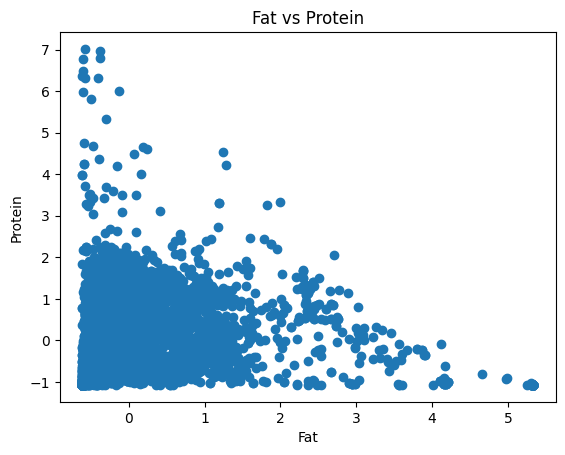

In [13]:
# Create a scatter plot using Protein and Fat, with the plot title “Fat vs Protein”, labeling the axes “Fat” and “Protein”, and making the data points red.
import matplotlib.pyplot as plt

plt.scatter(USDAclean['TotalFat'], USDAclean['Protein'])
plt.title('Fat vs Protein')
plt.xlabel('Fat')
plt.ylabel('Protein')
plt.show()

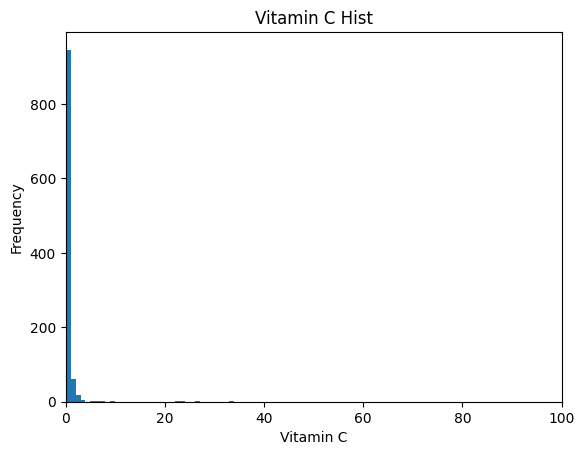

In [14]:
# Create a histogram of Vitamin C distribution in foods, with a limit of 0 to 100 on the x-axis and breaks of 100.

plt.hist(USDAclean['VitaminC'], bins=100, range=(0, 100))
plt.xlim(0, 100)
plt.title('Vitamin C Hist')
plt.xlabel('Vitamin C')
plt.ylabel('Frequency')
plt.show()

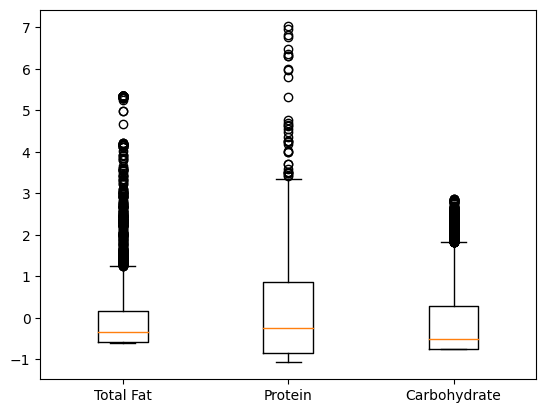

In [15]:
# Create a box and whisker plot to illustrate the distribution of values for Total Fat, Protein and Carbohydrate.

plt.boxplot([USDAclean['TotalFat'], USDAclean['Protein'], USDAclean['Carbohydrate']],
            labels=['Total Fat', 'Protein', 'Carbohydrate'])
plt.show()

In [16]:
# Add a new variable to the data frame that takes value 1 if the food has higher calories than average, 0 otherwise. Call this variable HighCals.

average_calories = USDAclean['Calories'].mean()

USDAclean['HighCals'] = (USDAclean['Calories'] > average_calories).astype(int)
USDAclean.head(3)

<ipython-input-16-e2837b3e7ebe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USDAclean['HighCals'] = (USDAclean['Calories'] > average_calories).astype(int)


,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighCals
0,2047,"SALT,TABLE",-1.275915,-1.072517,-0.613847,-0.749149,36.768772,-0.337948,-0.537535,-0.222680,-0.415050,-0.705853,-0.132433,-0.276157,-0.134147,0
1,2048,"VINEGAR,CIDER",-1.153954,-1.072517,-0.613847,-0.715488,-0.303307,-0.337948,-0.511493,-0.299109,-0.436646,-0.549456,-0.132433,-0.276157,-0.134147,0
2,2053,"VINEGAR,DISTILLED",-1.171377,-1.072517,-0.613847,-0.747702,-0.306177,-0.337948,-0.534930,-0.303605,-0.464888,-0.720290,-0.132433,-0.276157,-0.134147,0


In [17]:
# Calculate the average amount of iron by high and low calories (i.e. average amount of iron in foods with high calories and average amount of iron in foods with low calories).

average_iron_high_cals = USDAclean[USDAclean['HighCals'] == 1]['Iron'].mean()
average_iron_low_cals = USDAclean[USDAclean['HighCals'] == 0]['Iron'].mean()

average_iron_high_cals, average_iron_low_cals

(0.3256619802814466, -0.22069874525829727)

In [18]:
# Split USDAclean into a training and test set with a 70:30 split ratio.

import numpy as np

train, test = np.split(USDAclean.sample(frac=1), [int(0.7 * len(USDAclean))])
len(train), len(test)


(4417, 1893)

In [19]:
# Create a logistic regression model, using High Calories as the dependent variable, and Carbohydrate, Protein, Total Fat and Sodium as independent variables.
from sklearn.linear_model import LogisticRegression

independent_var = ['Carbohydrate', 'Protein', 'TotalFat', 'Sodium']
dependent_var = 'HighCals'

X_train = train[independent_var]
y_train = train[dependent_var]

X_test = test[independent_var]
y_test = test[dependent_var]

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Which independent variable is not significant?
# high/low correlation does not necessarily mean significant/non-significant

coefficients = model.coef_[0]

for variable, coefficient in zip(independent_var, coefficients):
    print(f'{variable}: {coefficient}')

Carbohydrate: 5.028121005430529
Protein: 1.7466976335283937
TotalFat: 8.436268027587928
Sodium: -0.04449604822261024


In [21]:
# Which independent variable has the strongest positive predictive power in the model?

coefficients = model.coef_[0]

for variable, coefficient in zip(independent_var, coefficients):
    print(f'{variable}: {coefficient}')

Carbohydrate: 5.028121005430529
Protein: 1.7466976335283937
TotalFat: 8.436268027587928
Sodium: -0.04449604822261024


In [22]:
# Test the model using the test dataset to predict High Calories.

y_pred = model.predict(X_test)

In [23]:
# Produce a confusion matrix (table) for the predictions on the test set and calculate overall accuracy.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1115
           1       0.97      0.98      0.98       778

    accuracy                           0.98      1893
   macro avg       0.98      0.98      0.98      1893
weighted avg       0.98      0.98      0.98      1893

